# Stock Portfolio Return Calculation


In [7]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

Please enter the stock tickers of your portfolio one by one, and enter "done" when finished.


In [8]:
tickers=[]
i=""
while not i=="done":
    i=input("Enter a ticker, or 'done' if you have finished entering tickers ")
    if not i =="done":
        tickers.append(i)
print(tickers)
data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

Enter a ticker, or 'done' if you have finished entering tickers PG
Enter a ticker, or 'done' if you have finished entering tickers AAPL
Enter a ticker, or 'done' if you have finished entering tickers MSFT
Enter a ticker, or 'done' if you have finished entering tickers done
['PG', 'AAPL', 'MSFT']


The following graph shows the change in stock price of each stock normalized to 100, as to compare each stock performance relative to the others in the portfolio.

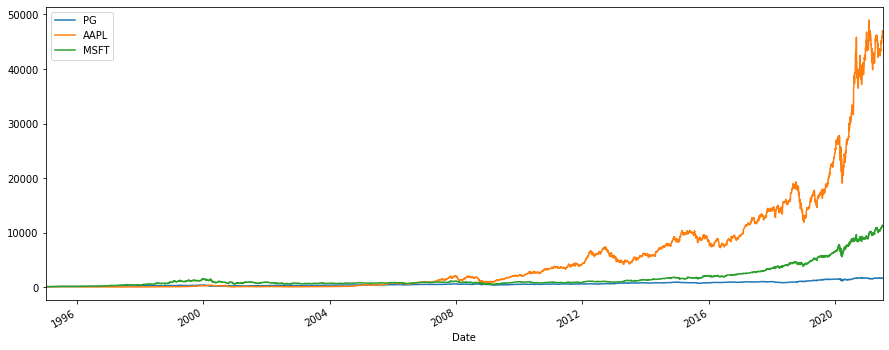

In [9]:
(data/data.iloc[0]*100).plot(figsize=(15,6))
plt.show()

- Enter a date to see the value of the stocks in the portfolio for that date.
- Enter the date in YYYY-MM-DD form: for example, 2004-02-04.

In [15]:
s=input("Enter a year as YYYY-MM-DD ")
print(data.loc[s])


Enter a year as YYYY-MM-DD 2001-01-03
PG      21.446026
AAPL     0.251445
MSFT    15.188696
Name: 2001-01-03 00:00:00, dtype: float64


- Enter weights for each stock in the portfolio.
- Weights **must add up to 1.0, and must be positive numbers.**

In [16]:
weights=[0]*len(tickers)
try:
    for num in range(0, len(tickers)):
        try:
            weights[num]=float(input("Enter weight for {} ".format(tickers[num])))
        except ValueError:
            print("Please enter a number")
    if not sum(weights) ==1:
        raise ValueError("Sum of weights should equal 1")
except ValueError as e:
    print(e)
    

Enter weight for PG .3
Enter weight for AAPL .2
Enter weight for MSFT .5


In [22]:
weights=np.array(weights)

In [23]:
returns = (data/data.shift(1))-1

In [25]:
annual_returns=returns.mean()*250

In the cell below, the portfolio return is calculated.

In [26]:
pfolio=str(round(np.dot(annual_returns, weights), 5)*100)+"%"
print(pfolio)

21.831%
